## Sample GP - Sparse (DTC, FITC, VFE)

Here's a list of sparse GPs implemented in gp.py (type1 interface).

- gp.sparse ( DTC w/o noise )
- gp.sparse_fitc (FITC)
- gp.sparse_vfe (VFE)

Functional interfaces are slightly different, but you can sample GP quite similar way as exact GP case.

But somehow GPLVM doesn't work well with this implementation. GPLVM examples use another interfaces defined in gpx.py.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
import numpyro.distributions as dist

from toygp import gp, kernels

## Define Input

In [2]:
num_data = 100

X = dist.Uniform().sample(jax.random.PRNGKey(0), sample_shape=(num_data,))
X = 10 * jnp.sort(X)
X = X[:, None]
X.shape

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


(100, 1)

## Define Kernel Function

In [3]:
length_scale = 1

kf = lambda x, y : kernels.rbf(x, y, length_scale)

## Exact GP

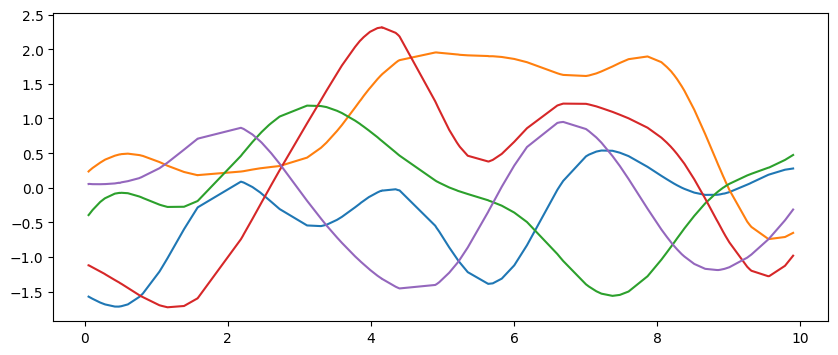

In [4]:
num_gp_samples = 5

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.figure(figsize=(10, 4))
plt.plot(X, f.T)
plt.show()

## Spase GP - DTC

gp.sparse function has a similar interface to gp.exact. But you also need the information of inducing points.

In [5]:
num_inducing_pts = 20

Xu = jnp.linspace(0, 10, num_inducing_pts)
Xu = Xu[:, None]
X.shape

(100, 1)

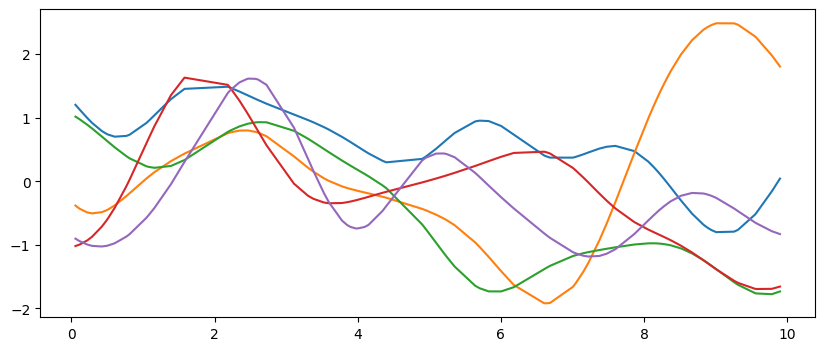

In [6]:
# Sample Standard Normal Random Vector
v = dist.Normal(0, 1).sample(jax.random.PRNGKey(1), sample_shape=(num_gp_samples, num_inducing_pts))

# Convert to GP
f = gp.sparse(kf, X, Xu, v)

plt.figure(figsize=(10, 4))
plt.plot(X, f.T)
plt.show()

## Sparse GP - FITC

In [7]:
noise_sd = 0.01

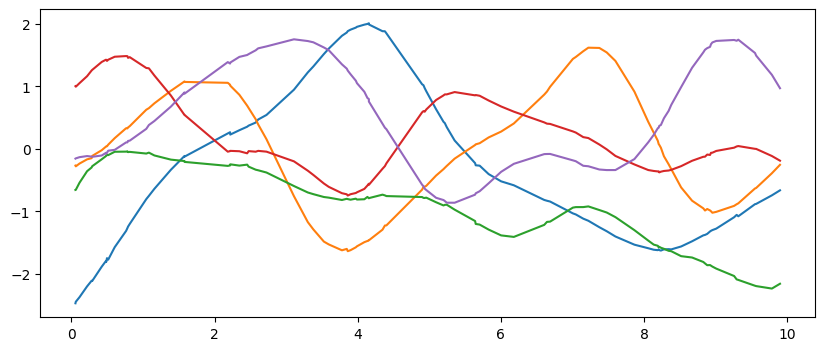

In [8]:
# Sample Standard Normal Random Vector
v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_inducing_pts))

# Generate Parameters
f_mu, f_sd = gp.sparse_fitc(kf, X, Xu, v, noise_sd)

# Sample GP
f = dist.Normal(f_mu, f_sd).sample(jax.random.PRNGKey(1))

plt.figure(figsize=(10, 4))
plt.plot(X, f.T)
plt.show()

## Sparse GP - VFE

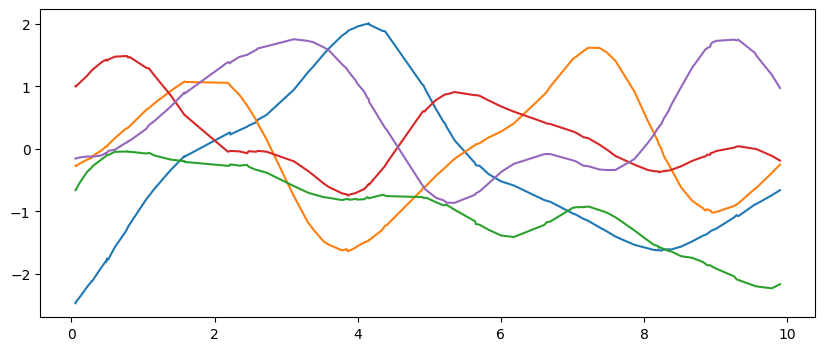

In [9]:
# Sample Standard Normal Random Vector
v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_inducing_pts))

# Generate Parameters
f_mu, f_sd = gp.sparse_vfe(kf, X, Xu, v, noise_sd)

# Sample GP
f = dist.Normal(f_mu, f_sd).sample(jax.random.PRNGKey(1))

plt.figure(figsize=(10, 4))
plt.plot(X, f.T)
plt.show()